In [66]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving auto-mpg .xlsx to auto-mpg .xlsx


In [67]:
df = pd.read_excel('/content/auto-mpg .xlsx')

In [68]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           98 non-null     int64  
 1   cylinders     98 non-null     int64  
 2   displacement  98 non-null     float64
 3   horsepower    98 non-null     int64  
 4   weight        98 non-null     int64  
 5   acceleration  96 non-null     float64
 6   model year    96 non-null     float64
 7   origin        98 non-null     int64  
 8   car name      98 non-null     object 
 9   CAR Number    91 non-null     object 
dtypes: float64(3), int64(5), object(2)
memory usage: 7.8+ KB


# Drop Column 'ORIGIN' from you dataset

In [70]:
df.drop(['origin'], axis=1, inplace=True)

# Find out all the missing values in the dataset and replace it with its most appropriate replacement.
[Python - Replacement of missing values with mean, median and mode](https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#Which_of_the_following_is_not_a_recommended_technique_for_imputing_missing_values_when_data_distribution_is_skewed)

In [72]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,2
model year,2
car name,0
CAR Number,7


In [73]:
# df['CAR Number'].dtype
# df['acceleration'].dtype
# df['model year'].dtype
df['model year'].value_counts()

,count
model year,
70.0,29
72.0,28
71.0,26
73.0,13


In [74]:
df['acceleration'] = df['acceleration'].fillna(df['acceleration'].mean())
df['model year'] = df['model year'].fillna(df['model year'].mode()[0])
df['CAR Number'] = df['CAR Number'].fillna(df['CAR Number'].mode()[0])

In [75]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
car name,0
CAR Number,0


# Drop Duplicate CAR Numbers in you Dataset

In [76]:
df.drop_duplicates(subset=['CAR Number'],inplace=True)

# Display the first five columns data in you Dataset

In [77]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


# Display last five columns data in the dataset

In [78]:
df.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67
97,18,6,225.0,105,3121,16.5,73.0,plymouth valiant,HUYT76


# Display the concise summary of your dataset

In [79]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.00000,89.000000
mean,18.056180,6.393258,261.162921,132.887640,3393.033708,13.95611,71.269663
std,5.484191,1.856304,124.013557,47.865683,959.202373,3.02890,1.074117
min,9.000000,3.000000,70.000000,46.000000,1773.000000,8.00000,70.000000
25%,14.000000,4.000000,121.000000,90.000000,2408.000000,12.00000,70.000000
50%,17.000000,8.000000,304.000000,140.000000,3449.000000,13.50000,71.000000
75%,22.000000,8.000000,351.000000,165.000000,4274.000000,15.50000,72.000000
max,31.000000,8.000000,455.000000,225.000000,5140.000000,23.50000,73.000000


# Display the name of the car with maximum number of horsepower

In [80]:
df[df['horsepower']==df['horsepower'].max()]['car name'].values[0]

'pontiac catalina'

# **MIN MAX SCALER**
Normalize the column “Weight” so that the values range from 0 to 1

In [81]:
df1 = df.copy()
# Numerator = df1['weight'] - df1['weight'].min()
# Denominator = df1['weight'].max() - df1['weight'].min()
# df1['weight'] = Numerator/Denominator
# df1.head()

#else
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
df1['weight'] = scaler.fit_transform(df1[['weight']])
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,0.514108,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,0.570241,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,0.493911,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,0.493020,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,0.497772,10.5,70.0,ford torino,JEETMEET


In [84]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


# **Z-SCORE NORMALIZATION**
Normalization is the process of transforming values of several variables into a
similar range. Typical normalizations include scaling the variable so the variable
average is 0, scaling the variable so the variance is 1, or scaling variable so the
variable values range from 0 to 1

In [86]:
df2 = df.copy()
# Numerator = df2['weight'] - df2['weight'].mean()
# Denominator = df2['weight'].std()
# df2['weight'] = Numerator/Denominator
# df2.head()

#else
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2['weight'] = scaler.fit_transform(df2[['weight']])
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,0.116341,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,0.314497,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,0.045048,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,0.041902,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,0.058677,10.5,70.0,ford torino,JEETMEET


# **MAX NORMALIZATION**

In [87]:
#Approach: replace original value by (original value)/(maximum value)
df3 = df.copy()
df3['weight'] = df3['weight']/df3['weight'].max()
df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,0.681712,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,0.718482,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,0.668482,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,0.667899,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,0.671012,10.5,70.0,ford torino,JEETMEET


In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it
has 57 unique values. What if we only care about the price difference between
cars with high horsepower, medium horsepower, and little horsepower (3
types)? Can we rearrange them into three ‘bins' to simplify analysis?

# In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the Pandas method 'cut' to segment the 'horsepower' column into 3
bins

In [129]:
df['horsepower_bins'] = pd.cut(df['horsepower'], bins = 3, labels = ['Low', 'Medium', 'High'])
df['horsepower_bins'].groupby(df['horsepower_bins']).count()
# df['horsepower_bins'].value_counts()

<ipython-input-129-4158214797>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['horsepower_bins'].groupby(df['horsepower_bins']).count()


,horsepower_bins
horsepower_bins,
Low,38
Medium,29
High,22


# Use a histogram to visualize the distribution of bins we created above.

**1. Using MATPLOTLIB**

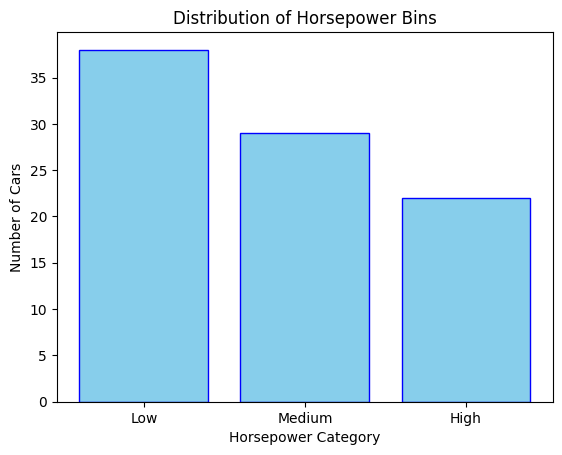

In [120]:
import matplotlib.pyplot as plt
counts = df['horsepower_bins'].value_counts().sort_index() #sorts by bin labels not value of bins.

plt.bar(counts.index.astype(str), counts.values, color='skyblue', edgecolor='blue')
plt.title('Distribution of Horsepower Bins')
plt.xlabel('Horsepower Category')
plt.ylabel('Number of Cars')
plt.show()

**2. Using SEABORN**

<ipython-input-125-2445209136>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='horsepower_bins', order=['Low', 'Medium', 'High'], palette='pastel')


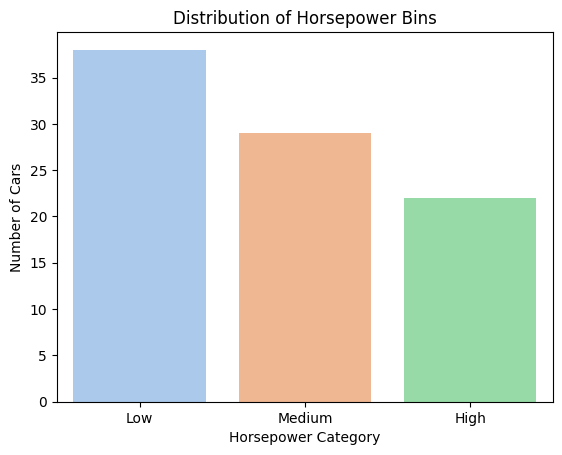

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='horsepower_bins', order=['Low', 'Medium', 'High'], palette='pastel')
plt.title('Distribution of Horsepower Bins')
plt.xlabel('Horsepower Category')
plt.ylabel('Number of Cars')
plt.show()

# **Detect outliers using Z-score and remove them**

1. Detect & Remove Outliers in One Column (e.g., 'horsepower')

In [141]:
import numpy as np
z_score = (df['horsepower'] - df['horsepower'].mean()) / (df['horsepower']).mean()
outliers = df[np.abs(z_score)<3]  #Keep rows where Z-score is less than 3 (no outliers)
print(f"Original rows: {df.shape[0]}")
print(f"Rows after removing outliers in 'horsepower': {outliers.shape[0]}")

Original rows: 89
Rows after removing outliers in 'horsepower': 89


2. Detect & Remove Outliers in All Numeric Columns

In [152]:
import numpy as np
from scipy.stats import zscore

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores for all numeric columns
z_scores = np.abs(zscore(df[numeric_cols]))

# Keep rows where all columns have Z-score < 3 (no outliers in any numeric column)
df_no_outliers = df[(z_scores < 3).all(axis=1)]

print(f"Original rows: {df.shape[0]}")
print(f"Rows after removing outliers in all numeric columns: {df_no_outliers.shape[0]}")

Original rows: 89
Rows after removing outliers in all numeric columns: 88


In [148]:
from scipy.stats import zscore
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_cols]))
mask = (z_scores < 3).all(axis=1) #use the mask to filter dataframe and keep only True rows

removed_rows = df[~mask]  #To find rows that got removed, using negation
removed_rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,horsepower_bins
59,23,4,97.0,54,2254,23.5,72.0,volkswagen type 3,ERT566,Low
